<a href="https://colab.research.google.com/github/amareLD/Flowers-Recognition-CNN/blob/main/Flowers_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Flowers Recognition with CNN**

In [ ]:
!pip install --upgrade pip
!pip install imagehash
!pip install tensorflow
#!pip install tensorflow-gpu==2.4.1
#!pip install tensorflow-gpu
!conda install tensorflow-gpu


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/bin/bash: conda: command not found


In [ ]:
import numpy as np # linear algebra
import pandas as pd
import tensorflow as tf

print(tf.__version__)

2.12.0


In [ ]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [ ]:
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Specify the path to your dataset folder in Google Drive
#dataset_folder = '/content/drive/MyDrive/Colab Notebooks/flowers'

# Change to the dataset folder directory
#%cd "{flowers}"
%cd '/content/drive/MyDrive/Colab Notebooks/flowers'

/content/drive/MyDrive/Colab Notebooks/flowers


In [ ]:
!ls

daisy  dandelion  rose	sunflower  tulip


In [ ]:
import os


dataset_path = '/content/drive/MyDrive/Colab Notebooks/flowers'  # Replace with the path to your image dataset folder in Google Drive

# Iterate through the files in the dataset folder
for root, _, files in os.walk(dataset_path):
    for file in files:
        file_path = os.path.join(root, file)

        # Perform operations on the image
        # Example: Display the file path
        print(file_path)

In [ ]:
#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

In [ ]:
# Ignore the warnings
import warnings
warnings.filterwarnings("always")
warnings.filterwarnings("ignore")

# data visualization and manipulation
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#configure
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

# preprocess
from keras.preprocessing.image import ImageDataGenerator

from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from keras.utils import to_categorical

import tensorflow as tf
import random as rn

import cv2
import numpy as np
from tqdm import tqdm
import os
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [ ]:
#lists all the files and directories in a specified directory.
print(os.listdir(dataset_path))

['daisy', 'dandelion', 'sunflower', 'rose', 'tulip']


In [ ]:
#find if data set have duplicate values
import imagehash

def find_duplicates(image_dir):
    image_files = os.listdir(image_dir)
    image_hashes = {}
    duplicate_images = []

    for image_file in image_files:
        image_path = os.path.join(image_dir, image_file)
        if os.path.isfile(image_path):
            with Image.open(image_path) as img:
                img_hash = imagehash.average_hash(img)
                if img_hash in image_hashes:
                    duplicate_images.append((image_path, image_hashes[img_hash]))
                else:
                    image_hashes[img_hash] = image_path

    return duplicate_images

dataset_path
duplicate_images = find_duplicates(dataset_path)

if duplicate_images:
    print("Duplicate images found:")
    for image_pair in duplicate_images:
        print(f"Image 1: {image_pair[0]}")
        print(f"Image 2: {image_pair[1]}")
        print()
else:
    print("No duplicate images found.")

No duplicate images found.


In [ ]:
#Iterate over each category, count the number of image files in each subdirectory, and print the results:
categories = ['daisy', 'dandelion', 'sunflower', 'rose', 'tulip']

for category in categories:
    if os.path.isdir(category):
        image_files = [file for file in os.listdir(category) if file.endswith('.jpg')]
        num_images = len(image_files)
        print(f"Category: {category} | Number of Images: {num_images}")

Category: daisy | Number of Images: 764
Category: dandelion | Number of Images: 1052
Category: sunflower | Number of Images: 733
Category: rose | Number of Images: 784
Category: tulip | Number of Images: 984


In [ ]:
#demonstrates how to handle potential errors when loading images:
image_files = [file for file in os.listdir(dataset_path) if file.endswith('.jpg')]

for file in image_files:
    try:
        img = cv2.imread(os.path.join(dataset_path, file))
        if img is None:
            raise Exception("Failed to load image")

        # Perform further processing with the image

    except Exception as e:
        print(f"Error processing image: {file} - {e}")

In [ ]:
X = []
Z = []

flower_daisy = "/content/drive/MyDrive/Colab Notebooks/flowers/daisy"
flower_sunflower = "/content/drive/MyDrive/Colab Notebooks/flowers/sunflower"
flower_tulip = "/content/drive/MyDrive/Colab Notebooks/flowers/tulip"
flower_dandelion = "/content/drive/MyDrive/Colab Notebooks/flowers/dandelion"
flower_rose = "/content/drive/MyDrive/Colab Notebooks/flowers/rose"

In [ ]:
def assign_label(img, flower_type):
    return flower_type

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def make_train_data(flower_type, DIR):
    #datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values between 0 and 1

    for img in tqdm(os.listdir(DIR)):
        label = assign_label(img, flower_type)
        path = os.path.join(DIR, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (150, 150))


        #img = img.astype('float32')  # Convert image data type to float32
        #img = datagen.standardize(img)  # Apply normalization

        X.append(np.array(img))
        Z.append(str(label))



In [ ]:
make_train_data("Daisy",flower_daisy)
print(len(X))

100%|██████████| 764/764 [00:03<00:00, 226.09it/s]

764


In [ ]:
make_train_data("Sunflower",flower_sunflower)
print(len(X))

100%|██████████| 733/733 [00:04<00:00, 183.14it/s]

1497


In [ ]:
make_train_data("Tulip",flower_tulip)
print(len(X))

100%|██████████| 984/984 [00:04<00:00, 206.14it/s]

2481


In [ ]:
make_train_data("Dandelion",flower_dandelion)
print(len(X))

100%|██████████| 1052/1052 [00:04<00:00, 212.68it/s]

3533


In [ ]:
make_train_data("Rose",flower_rose)
print(len(X))

100%|██████████| 784/784 [00:03<00:00, 246.47it/s]

4317


## **`Visualization`**

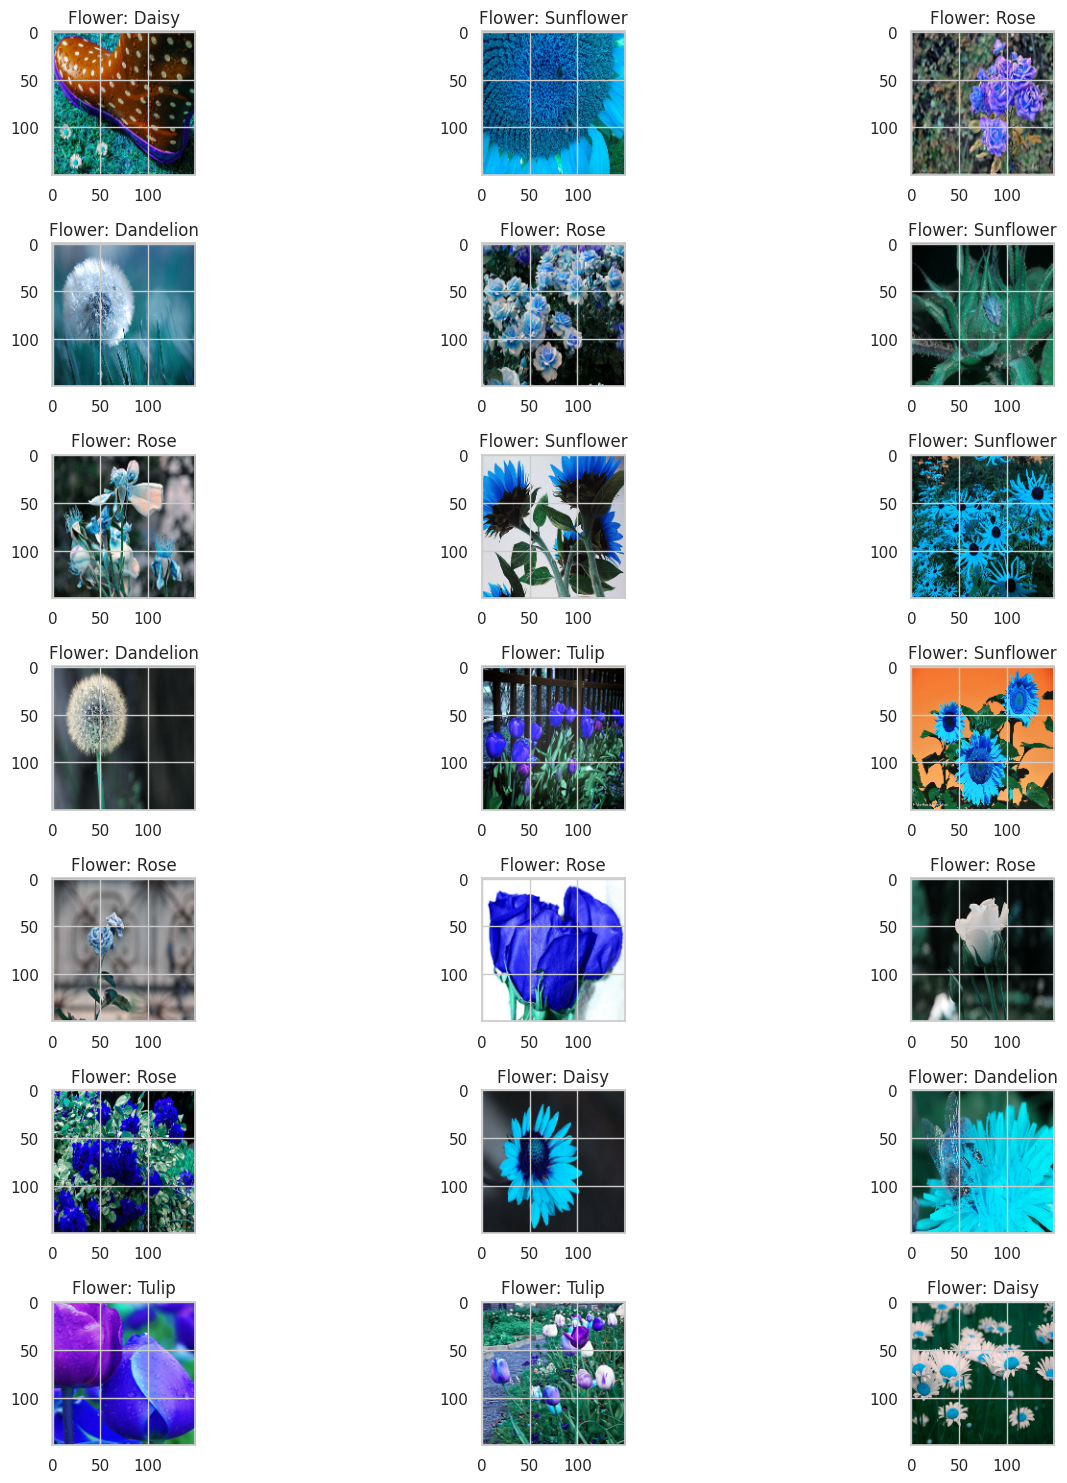

In [ ]:
f,ax = plt.subplots(7,3)
f.set_size_inches(15,15)
for i in range(7):
    for j in range(3):
        l = rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title("Flower: " + Z[l])


plt.tight_layout()

In [ ]:
# Label Encoding the Y array (i.e. Daisy->0, Rose->1 etc...) & then One Hot Encoding
labelEncoder = LabelEncoder()
Y = labelEncoder.fit_transform(Z)
Y = to_categorical(Y,5)
X = np.array(X)
X = X/ 255

### Train and **Test**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

x_train shape:  (3453, 150, 150, 3)
x_test shape:  (864, 150, 150, 3)
y_train shape:  (3453, 5)
y_test shape:  (864, 5)


# Convolutional Neural **Network**

In [ ]:
# modelling
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size=(3,3), padding = "Same", activation="relu", input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding  = "Same", activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3), padding  = "Same", activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3), padding  = "Same", activation = "relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dense(1024, activation="relu"))
model.add(Dense(5, activation="softmax"))

In [ ]:
# Epochs and Batch Size
epochs = 50
batch_size = 32

In [ ]:
# data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,   # set each sample mean to 0
    featurewise_std_normalization=False,   # divide inputs by std of the dataset
    samplewise_std_normalization= False,   # divide each input by its std
    zca_whitening=False,   # dimesion reduction
    rotation_range=10,    # randomly rotate images in the range 10 degrees
    zoom_range=0.1,      # Randomly zoom image 10%
    width_shift_range=0.2,   # randomly shift images horizontally 20%
    height_shift_range=0.2,   # randomly shift images vertically 20%
    horizontal_flip=True,     # randomly flip images
    vertical_flip=False    # randomly flip images
)
datagen.fit(x_train)

In [ ]:
# Compiling the Keras Model
model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics = ["accuracy"])


In [ ]:
# summary
model.summary()

In [ ]:
# Fitting on the Training set and making predcitons on the Validation set
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size = batch_size),
                              epochs= epochs,
                              validation_data=(x_test,y_test),
                              verbose = 1,
                              steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/50
107/107 [==============================] - 137s 1s/step - loss: 1.3999 - accuracy: 0.3791 - val_loss: 1.3352 - val_accuracy: 0.3750
Epoch 2/50
107/107 [==============================] - 142s 1s/step - loss: 1.1196 - accuracy: 0.5159 - val_loss: 1.1166 - val_accuracy: 0.5833
Epoch 3/50
107/107 [==============================] - 136s 1s/step - loss: 0.9818 - accuracy: 0.6171 - val_loss: 0.8724 - val_accuracy: 0.6620
Epoch 4/50
107/107 [==============================] - 133s 1s/step - loss: 0.9079 - accuracy: 0.6425 - val_loss: 0.8188 - val_accuracy: 0.6840
Epoch 5/50
107/107 [==============================] - 131s 1s/step - loss: 0.8634 - accuracy: 0.6662 - val_loss: 0.8329 - val_accuracy: 0.6887
Epoch 6/50
107/107 [==============================] - 134s 1s/step - loss: 0.8409 - accuracy: 0.6735 - val_loss: 0.8325 - val_accuracy: 0.6991
Epoch 7/50
107/107 [==============================] - 132s 1s/step - loss: 0.8243 - accuracy: 0.6878 - val_loss: 0.8048 - val_accuracy: 0.7060

## Evaluating the Model **Performance**

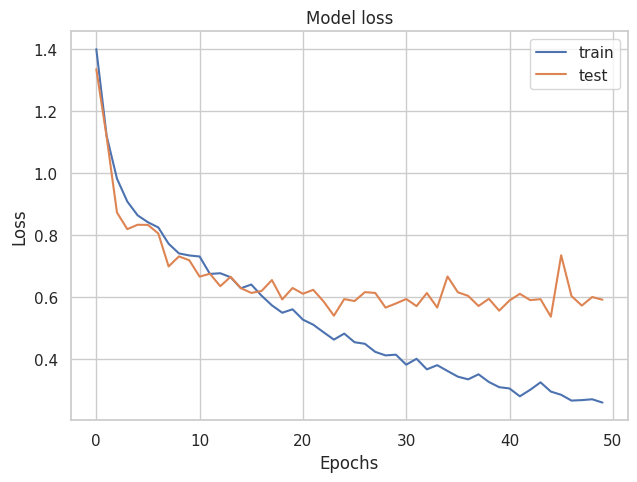

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["train","test"])
plt.show()

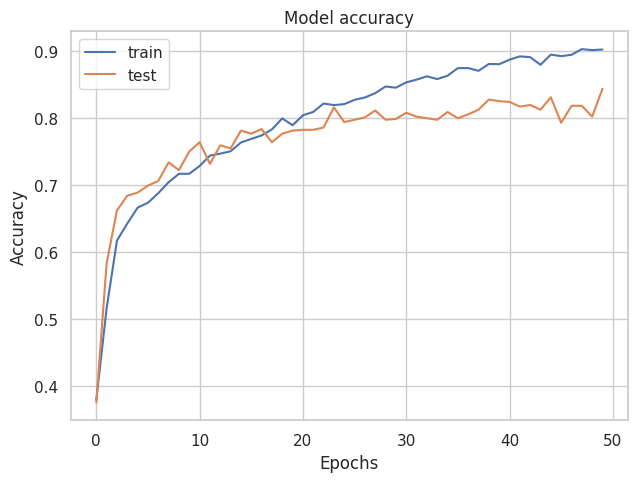

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["train","test"])
plt.show()

# **Visualizing Predictons on the Validation Set**

In [ ]:
# getting predictions on validation set
pred = model.predict(x_test)

test_loss, test_accuracy = model.evaluate_generator(datagen.flow(x_test, y_test, batch_size=batch_size))
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

predict_digits = np.argmax(pred, axis = 1)

27/27 [==============================] - 8s 270ms/step
Test Loss: 0.6972591876983643
Test Accuracy: 0.7974537014961243


In [ ]:
# We will create two arrays to sort the correct and incorrect predictions and throw them in
i = 0
right_class = []
wrong_class = []

for i in range(len(y_test)):
    if(np.argmax(y_test[i]) == predict_digits[i]):
        right_class.append(i)
    if(len(right_class) == 10):
        break

i = 0

for i in range(len(y_test)):
    if(np.argmax(y_test[i]) != predict_digits[i]):
        wrong_class.append(i)
    if(len(wrong_class) == 10):
        break

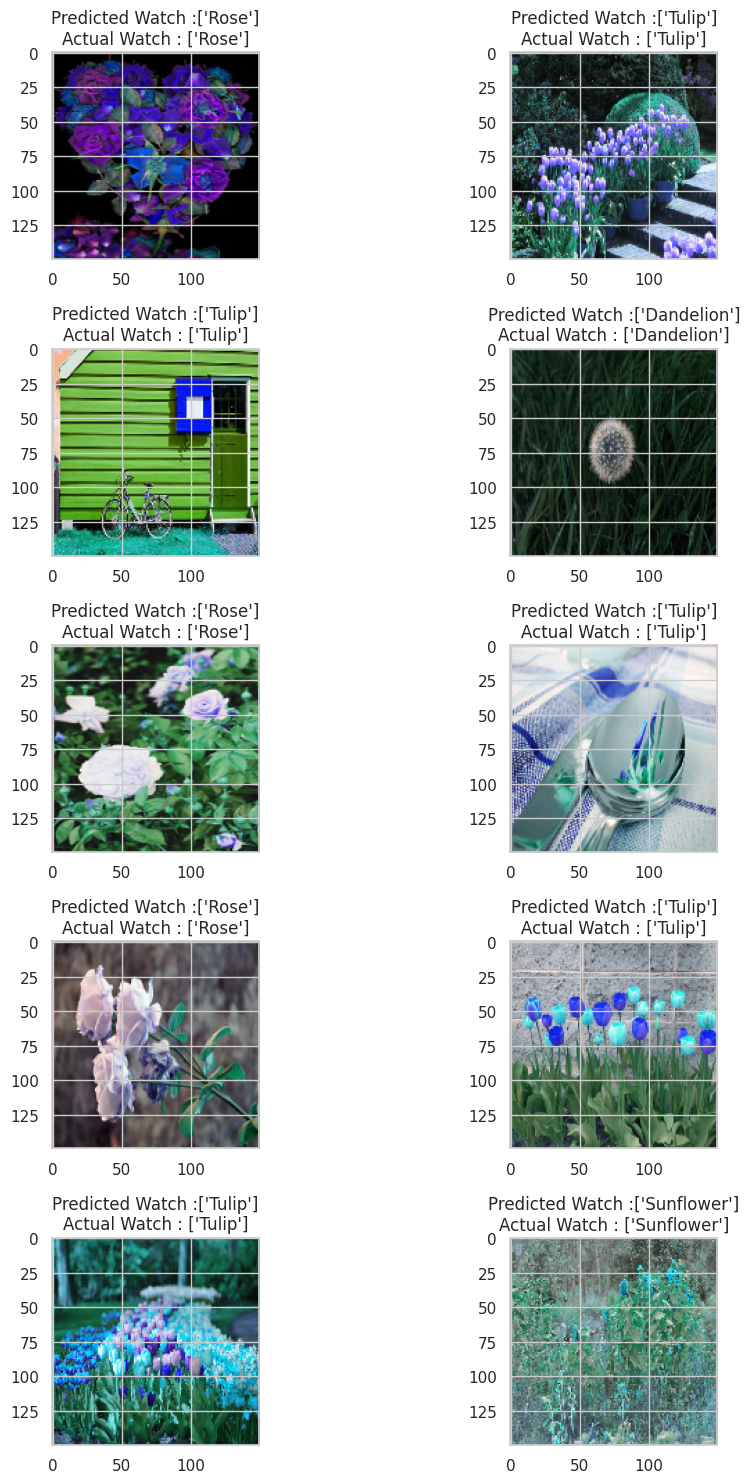

In [ ]:
count = 0
f,ax = plt.subplots(5,2)
f.set_size_inches(15,15)
for i in range(5):
    for j in range(2):
        ax[i,j].imshow(x_test[right_class[count]])
        ax[i,j].set_title("Predicted Watch :"+str(labelEncoder.inverse_transform([predict_digits[right_class[count]]]))
                          +"\n"+"Actual Watch : "+str(labelEncoder.inverse_transform([np.argmax(y_test[right_class[count]])])))

        plt.tight_layout()
        count += 1

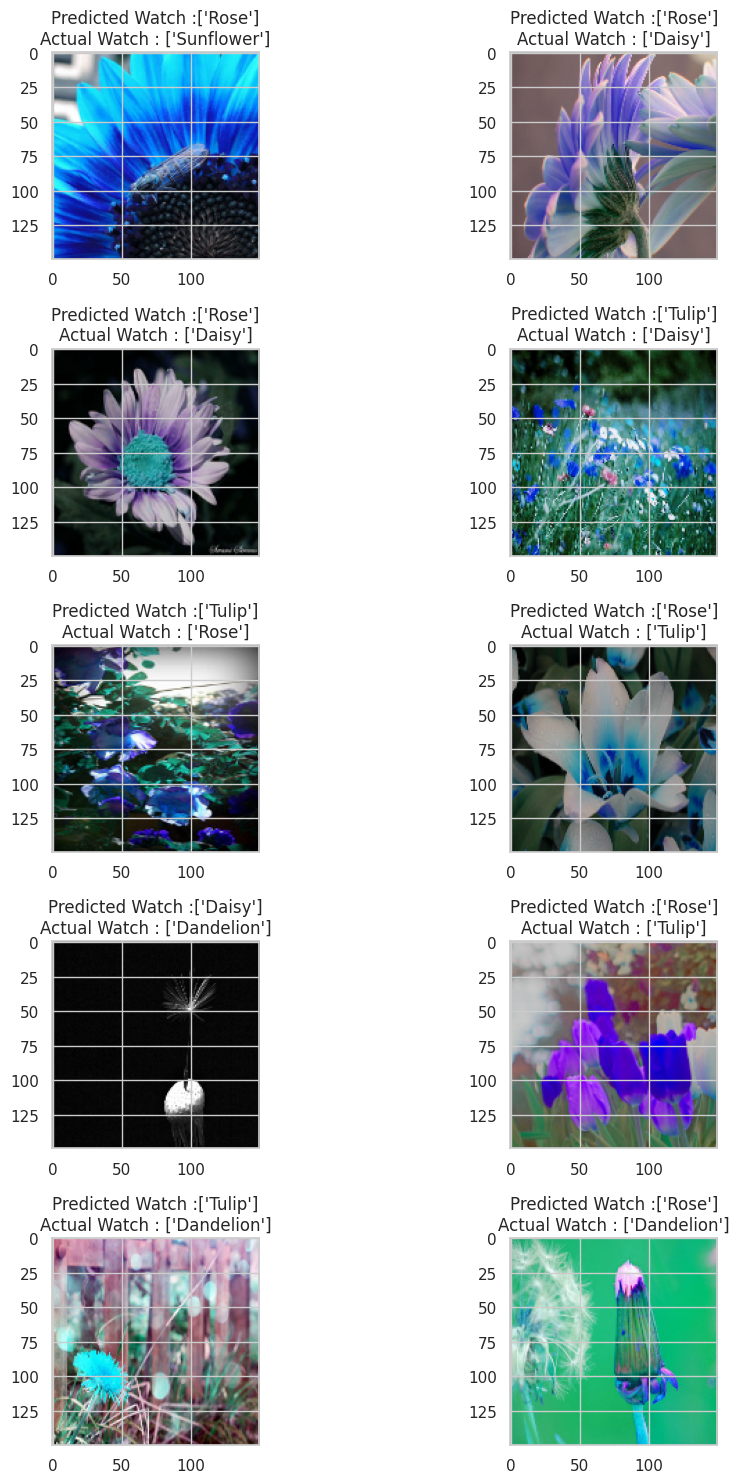

In [ ]:
count = 0
f,ax = plt.subplots(5,2)
f.set_size_inches(15,15)
for i in range(5):
    for j in range(2):
        ax[i,j].imshow(x_test[wrong_class[count]])
        ax[i,j].set_title("Predicted Watch :"+str(labelEncoder.inverse_transform([predict_digits[wrong_class[count]]]))
                          +"\n"+"Actual Watch : "+str(labelEncoder.inverse_transform([np.argmax(y_test[wrong_class[count]])])))

        plt.tight_layout()
        count += 1

In [ ]:
num_features = x_train.shape[1]
print("Total number of features:", num_features)

Total number of features: 150


In [ ]:
# Save the weights
model.save_weights('/content/drive/MyDrive/Colab Notebooks/weights.h5')

In [ ]:
# Define the value of k (number of top features)
k = 10

# Retrieve the weights of the first layer
weights = model.layers[0].get_weights()[0]

# Calculate the average weights for each feature
average_weights = np.mean(weights, axis=(0, 1, 2))

# Get the indices of the top-k features with the highest average weights
top_k_features = np.argsort(average_weights)[-k:]

# Print the indices of the top-k features
print("Top", k, "features:")
print(top_k_features)


Top 10 features:
[ 3 23 31 25  7 22 11 10 15 21]


(3, 3, 3, 32)


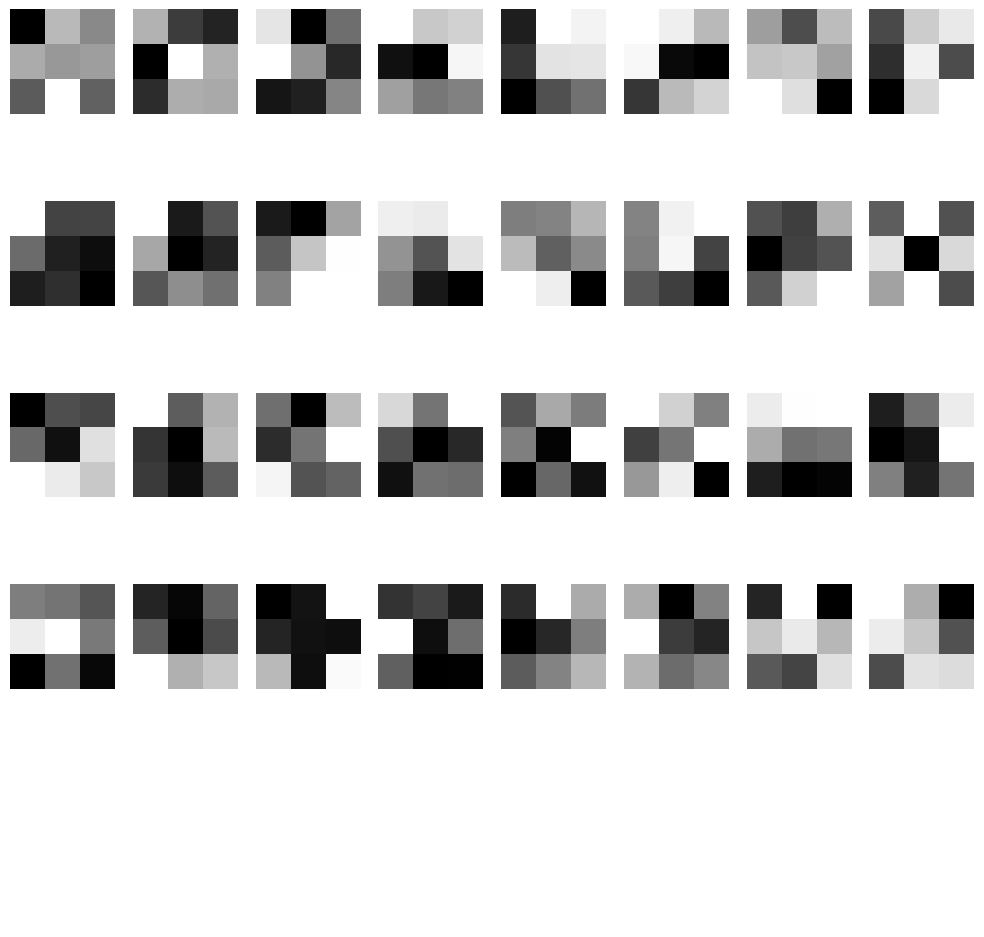

In [ ]:
layer_idx = 0  # Index of the layer to visualize (e.g., 0 for the first convolutional layer)

# Extract the weights of the desired layer
weights = model.layers[layer_idx].get_weights()[0]


# Check the dimensions of the weights array
print(weights.shape)  # Make sure the shape is as expected

# Plot the filters if the dimensions are correct
if len(weights.shape) == 4:
    n_filters = weights.shape[3]  # Number of filters in the layer
    n_cols = 8  # Number of columns in the subplot grid
    n_rows = (n_filters // n_cols) + 1  # Number of rows in the subplot grid

    fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 10))
    for i, ax in enumerate(axs.flatten()):
        if i < n_filters:
            ax.imshow(weights[:, :, 0, i], cmap='gray')  # Visualize the weights of the i-th filter
        ax.axis('off')
    plt.tight_layout()
    plt.show()
else:
    print("Invalid dimensions for the weights array.")

1/1 [==============================] - 0s 27ms/step


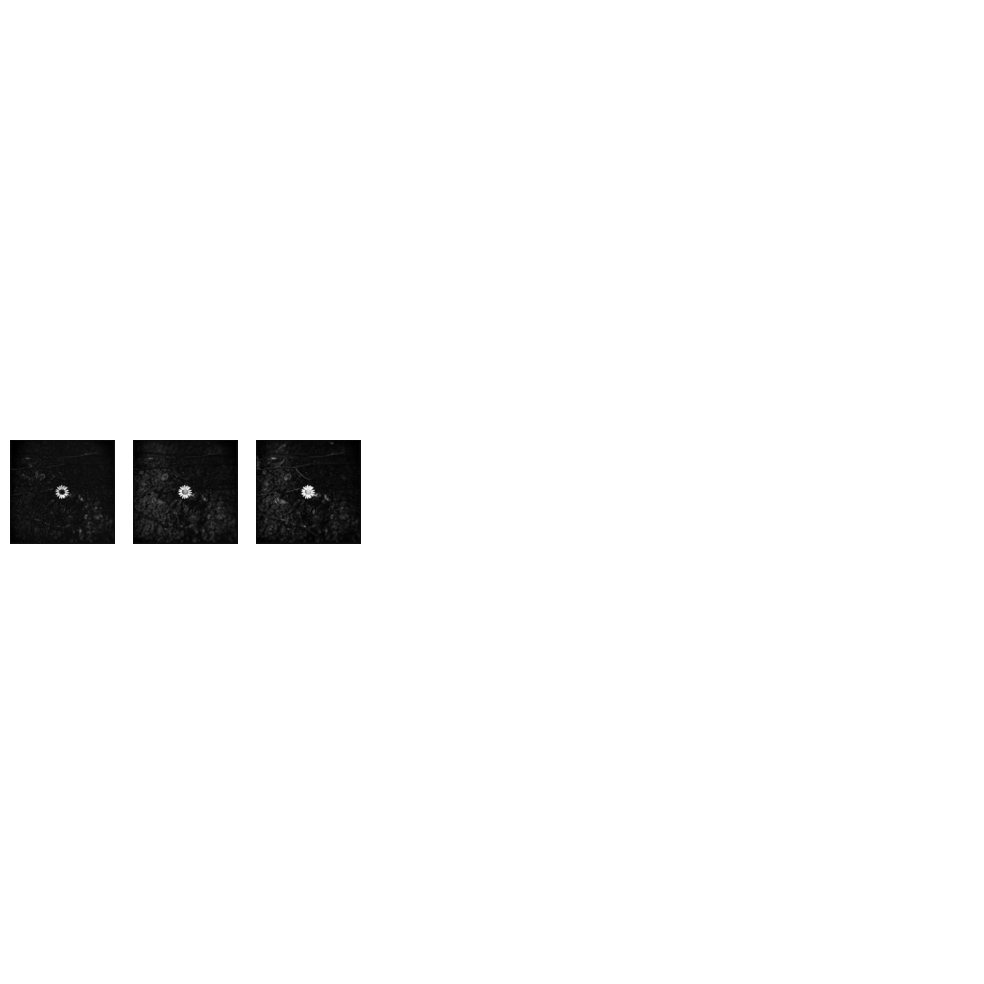

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense

# Define the model using the functional API
inputs = Input(shape=(150, 150, 3))
x = Conv2D(filters=32, kernel_size=(3, 3), padding="Same", activation="relu")(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(filters=64, kernel_size=(3, 3), padding="Same", activation="relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(filters=96, kernel_size=(3, 3), padding="Same", activation="relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(filters=96, kernel_size=(3, 3), padding="Same", activation="relu")(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dense(1024, activation="relu")(x)
outputs = Dense(5, activation="softmax")(x)

model = Model(inputs=inputs, outputs=outputs)

# Choose the layer to visualize
layer_idx = 0  # Index of the layer to visualize (e.g., 0 for the first convolutional layer)

# Create a new model to extract features
feature_model = Model(inputs=model.input, outputs=model.layers[layer_idx].output)

# Select an input image from your dataset
input_image = X[0]  # Replace X[0] with your input image

# Reshape the input image to match the expected shape of the model
input_image = np.expand_dims(input_image, axis=0)

# Extract the features from the chosen layer
features = feature_model.predict(input_image)

# Visualize the features
n_filters = features.shape[-1]  # Number of filters in the layer
n_cols = 8  # Number of columns in the subplot grid
n_rows = (n_filters // n_cols) + 1  # Number of rows in the subplot grid

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 10))
for i, ax in enumerate(axs.flatten()):
    if i < n_filters:
        ax.imshow(features[0, :, :, i], cmap='gray')  # Visualize the features of the i-th filter
    ax.axis('off')
plt.tight_layout()
plt.show()